In [31]:
import pandas as pd
import numpy as ny
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None

In [32]:
data = pd.read_csv('Train.csv')
data_exp = pd.read_csv('Test.csv')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [34]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,2011-03-01 12:07:00,1.65,17965.0,35
284776,13982,2184,2947,16,2011-10-13 15:08:00,0.65,16793.0,35
284777,6641,667,3632,4,2011-05-16 12:59:00,8.50,14755.0,35
284778,13820,1576,3089,48,2011-10-11 14:18:00,3.45,14866.0,35


In [35]:
#sum of null value in dataset
def col_null(x):
    null_columns = x.columns[x.isnull().any()]
    print(x[null_columns].isnull().sum())

In [36]:
col_null(data)

Series([], dtype: float64)


In [37]:
col_null(data_exp)

Series([], dtype: float64)


In [38]:
#number of unique entries in columns
data.nunique(axis=0)

InvoiceNo      20971
StockCode       3619
Description     3819
Quantity         373
InvoiceDate    19451
UnitPrice        524
CustomerID      4339
Country           37
dtype: int64

In [39]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data_exp['InvoiceDate']=pd.to_datetime(data_exp['InvoiceDate'])

In [40]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,2011-03-01 12:07:00,1.65,17965.0,35
284776,13982,2184,2947,16,2011-10-13 15:08:00,0.65,16793.0,35
284777,6641,667,3632,4,2011-05-16 12:59:00,8.50,14755.0,35
284778,13820,1576,3089,48,2011-10-11 14:18:00,3.45,14866.0,35


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    284780 non-null  int64         
 1   StockCode    284780 non-null  int64         
 2   Description  284780 non-null  int64         
 3   Quantity     284780 non-null  int64         
 4   InvoiceDate  284780 non-null  datetime64[ns]
 5   UnitPrice    284780 non-null  float64       
 6   CustomerID   284780 non-null  float64       
 7   Country      284780 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 17.4 MB


In [42]:
pearson_df=data.corr(method='pearson')

In [43]:
pearson_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceNo,1.000000,0.086809,0.024804,-0.008363,0.007927,-0.007463,0.005432
StockCode,0.086809,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242
Description,0.024804,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791
Quantity,-0.008363,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001
UnitPrice,0.007927,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378
CustomerID,-0.007463,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198
Country,0.005432,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000


In [44]:
#sns.pairplot(data)

In [45]:
data=data.drop(columns=['InvoiceNo'],axis=1)
data_exp=data_exp.drop(columns=['InvoiceNo'],axis=1)

<AxesSubplot:xlabel='UnitPrice'>

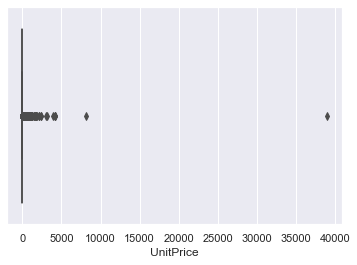

In [46]:
sns.boxplot(data['UnitPrice'])

In [47]:
data=data.loc[data['UnitPrice']<20]

<AxesSubplot:xlabel='UnitPrice'>

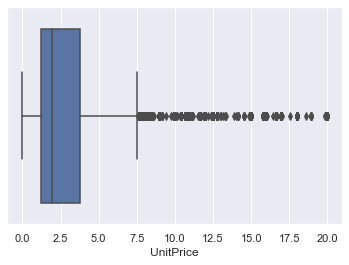

In [48]:
sns.boxplot(data['UnitPrice'])

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

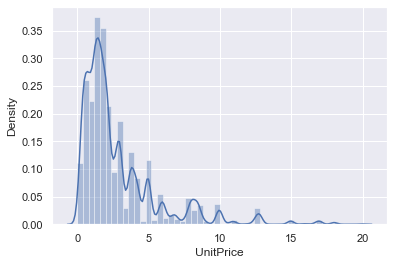

In [49]:
sns.distplot(data['UnitPrice'].loc[data['UnitPrice']<20])

In [50]:
data['UnitPrice']=ny.sqrt(data['UnitPrice'])

In [51]:
df=ny.sqrt(data['UnitPrice'])

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

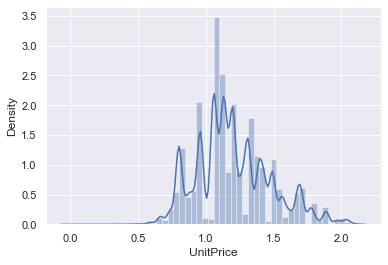

In [52]:
sns.distplot(df)

In [14]:
# Setting X and y variables
X = data.loc[:,data.columns != 'UnitPrice']
y = data['UnitPrice']

In [15]:
X

,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,1583,144,3,2011-05-06 16:54:00,14056.0,35
1,1300,3682,6,2011-05-11 07:35:00,13098.0,35
2,2178,1939,4,2011-11-20 13:20:00,15044.0,35
3,2115,2983,1,2011-11-22 12:07:00,15525.0,35
4,1210,2886,12,2011-05-06 09:00:00,13952.0,35
...,...,...,...,...,...,...
284775,1706,1081,6,2011-03-01 12:07:00,17965.0,35
284776,2184,2947,16,2011-10-13 15:08:00,16793.0,35
284777,667,3632,4,2011-05-16 12:59:00,14755.0,35
284778,1576,3089,48,2011-10-11 14:18:00,14866.0,35


In [16]:
y

0         3.75
1         1.95
2         5.95
3         0.83
4         1.65
          ... 
284775    1.65
284776    0.65
284777    8.50
284778    3.45
284779    0.75
Name: UnitPrice, Length: 284780, dtype: float64

In [27]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56956 entries, 136576 to 166251
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   StockCode    56956 non-null  int64         
 1   Description  56956 non-null  int64         
 2   Quantity     56956 non-null  int64         
 3   InvoiceDate  56956 non-null  datetime64[ns]
 4   CustomerID   56956 non-null  float64       
 5   Country      56956 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 3.0 MB


Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
X_test['InvoiceDate']=le.fit_transform(X_test['InvoiceDate'])
X_train['InvoiceDate']=le.fit_transform(X_train['InvoiceDate'])
data_exp['InvoiceDate']=le.fit_transform(data_exp['InvoiceDate'])

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56766 entries, 167132 to 40852
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StockCode    56766 non-null  int64  
 1   Description  56766 non-null  int64  
 2   Quantity     56766 non-null  int64  
 3   InvoiceDate  56766 non-null  int64  
 4   CustomerID   56766 non-null  float64
 5   Country      56766 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.0 MB


In [32]:
# Visualizing Feature Importance
def fea_imp(X):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [33]:
#Visualizing Actual and Predict value plot
def act_pred(actual,predict):
    df_temp = pd.DataFrame({'Actual': actual, 'Predicted':predict})
    df_temp.head()
    # Creating Line Graph
    figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
    y1 = df_temp['Actual']
    y2 = df_temp['Predicted']
    plt.plot(y1, label = 'Actual')
    plt.plot(y2, label = 'Predicted')
    plt.legend()
    plt.show()

In [34]:
#RMSE calculation
def rmse_val(actual,predict):
    mse = mean_squared_error(actual, predict)
    rmse = sqrt(mse)
    return rmse

In [35]:
evaluation = pd.DataFrame(columns=['Model','RMSE'])

Random Forest Algorithm

In [36]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

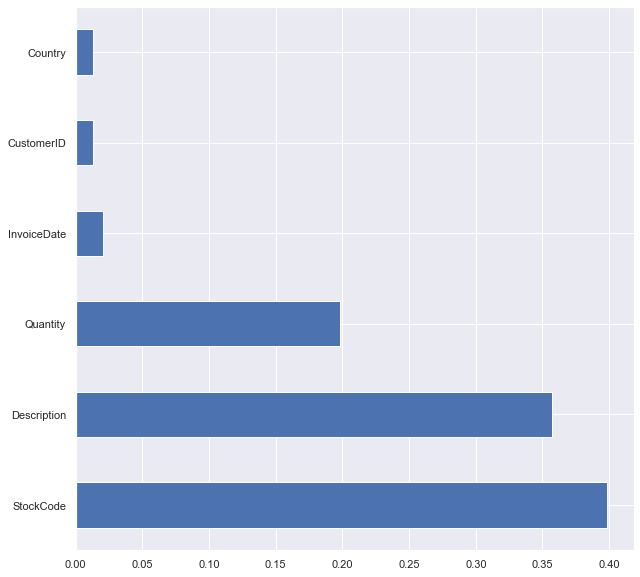

In [37]:
fea_imp(X)

In [38]:
#act_pred(y_test,pred)

In [39]:
rmse_val(y_test,pred)

0.14640444999963353

In [40]:
res=rmse_val(y_test,pred)

In [41]:
df={'Model':'RandomForestRegressor','RMSE':res}

In [42]:
evaluation=evaluation.append(df,ignore_index=True)

Using XGBOOST Algorithm

In [43]:
#Using XGBoost algorithm
gbm = xgb.XGBRegressor()
reg_cv = GridSearchCV(gbm, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
reg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [44]:
reg_cv.best_params_

{'colsample_bytree': 1.0,
 'max_depth': 6,
 'min_child_weight': 1.0,
 'n_estimators': 1000}

In [45]:
gbm = xgb.XGBRegressor(**reg_cv.best_params_)
gbm.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1.0, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
predictions = gbm.predict(X_test)
predictions

array([1.2940787 , 1.1159458 , 1.3015516 , ..., 1.8780427 , 1.1276925 ,
       0.64747494], dtype=float32)

In [47]:
rmse_val(y_test,predictions)

0.13065654943505808

In [48]:
df={'Model':'XGBRegressor','RMSE':rmse_val(y_test,predictions)}
evaluation=evaluation.append(df,ignore_index=True)

Multiple Algorithm

In [49]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

In [50]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    raw= rmse_val(y_test,y_pred)
    df1={'Model':name,'RMSE':raw}
    evaluation=evaluation.append(df1,ignore_index=True)

In [51]:
evaluation

,Model,RMSE
0,RandomForestRegressor,0.146404
1,XGBRegressor,0.130657
2,LinearRegression(),0.701069
3,Ridge(),0.701069
4,Lasso(),0.701343
5,KNeighborsRegressor(),0.702209
6,DecisionTreeRegressor(),0.196833


* Having XGBRegressor as best model

In [52]:
predict_val=gbm.predict(data_exp)

In [54]:
predict_val=ny.square(predict_val)

In [55]:
df=pd.DataFrame(predict_val, columns=['UnitPrice'])

In [56]:
df['UnitPrice']=df['UnitPrice'].round(2)

In [57]:
df.to_csv('submit_XGBoost.csv',index=False)

In [ ]:
#Using Deep learning regression algorithm
import keras
import keras.backend as kb
import tensorflow as tf

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[7]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

In [399]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer)
model.fit(X_train,y_train,epochs=500)

Epoch 1/500
7120/7120 [==============================] - 5s 669us/step - loss: 12676984.0000
Epoch 2/500
7120/7120 [==============================] - 4s 625us/step - loss: 7402.4414
Epoch 3/500
7120/7120 [==============================] - 5s 674us/step - loss: 7402.2480
Epoch 4/500
7120/7120 [==============================] - 6s 838us/step - loss: 7402.3843
Epoch 5/500
7120/7120 [==============================] - 6s 783us/step - loss: 7402.3804
Epoch 6/500
7120/7120 [==============================] - 5s 706us/step - loss: 7402.4248
Epoch 7/500
7120/7120 [==============================] - 5s 725us/step - loss: 7402.4385
Epoch 8/500
7120/7120 [==============================] - 5s 713us/step - loss: 7402.3423
Epoch 9/500
7120/7120 [==============================] - 5s 748us/step - loss: 7402.3833
Epoch 10/500
7120/7120 [==============================] - 5s 713us/step - loss: 7402.3086
Epoch 11/500
7120/7120 [==============================] - 5s 732us/step - loss: 7402.3994
Epoch 12/500
71

In [400]:
predi=model.predict(X_test)

In [401]:
predi

array([[2.9435225],
       [2.9435225],
       [2.9435225],
       ...,
       [2.9435225],
       [2.9435225],
       [2.9435225]], dtype=float32)

In [402]:
rmse_val(y_test,predi)

33.526134939497446
